In [15]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

import graphviz

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica or versicolor which are more difficult to discriminate). Learn the tree in these conditions.
2. modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor or vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
3. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
4. build the confusion matrix of the created tree models on the test set and show them. 
5. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

# 1. Exercise

get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica or versicolor which are more difficult to discriminate). Learn the tree in these conditions.

In [16]:
iris = load_iris()
random_state = 5

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                        iris.target, 
                                                        test_size=0.20, 
                                                        random_state=random_state)

print(f'X_train: {X_train.shape}\t X_test: {X_test.shape}\t y_train: {y_train.shape}\t y_test: {y_test.shape}')

X_train: (120, 4)	 X_test: (30, 4)	 y_train: (120,)	 y_test: (30,)


In [17]:
# Inflate Virginica and Versicolor
inflation = 10 
keep = np.clip(y_train * inflation, a_min=1, a_max=inflation)
X_train_inflated = np.repeat(X_train, keep, axis=0)
y_train_inflated = np.repeat(y_train, keep, axis=0)

print(f"X_Train: {len(X_train_inflated)}\t X_Test: {len(X_test)}\
        \t y_Train: {len(y_train_inflated)}\t y_Test: {len(y_test)}")



# Fit Decision Tree Classifier
clf_inflated = DecisionTreeClassifier(criterion='entropy',
                                        random_state=300, 
                                        min_samples_leaf=5)
clf_inflated = clf_inflated.fit(X_train_inflated, y_train_inflated)

# Predict test set
clf_inflated_pred = clf_inflated.predict(X_test)

# Print results
print(f"Predictions:\n{clf_inflated_pred} Lenght:{len(clf_inflated_pred)}")
print(f"True Classes: \n{y_test} Lenght: {len(y_test)}")

truth_table = clf_inflated_pred == y_test

print(f"\n Are the Predictions and True classes the same? {(truth_table).all()}")
print(f"{truth_table} Length: {len(truth_table)}")
print(f"True: {sum(truth_table)} False: {len(y_test)-sum(truth_table)}")


X_Train: 822	 X_Test: 30        	 y_Train: 822	 y_Test: 30
Predictions:
[1 1 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2] Lenght:30
True Classes: 
[1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2] Lenght: 30

 Are the Predictions and True classes the same? False
[ True False  True  True  True  True  True False  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True] Length: 30
True: 27 False: 3


#### Scoring and tree graph

In [18]:
# Accuracy score
acc_score = accuracy_score(y_test, clf_inflated_pred)
print(f"Accuracy score: {acc_score}")

# Macro F1 score
f1 = f1_score(y_test, clf_inflated_pred, average='macro')
print(f"F1 score: {f1}")

Accuracy score: 0.9
F1 score: 0.9089026915113871


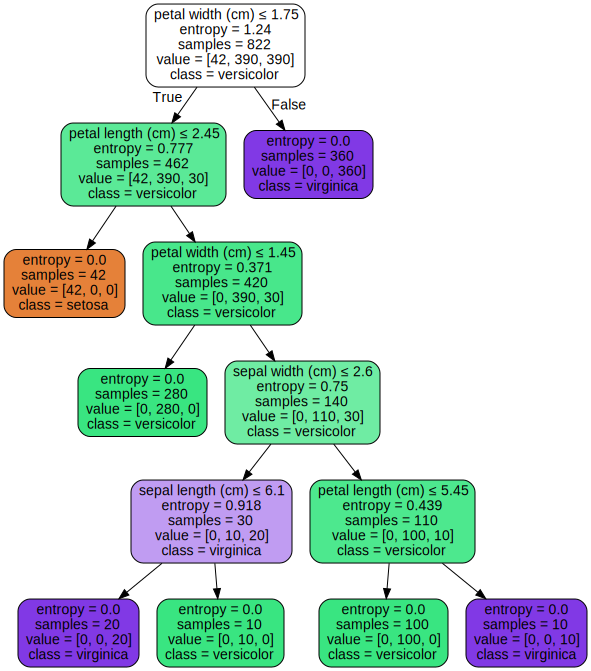

In [19]:
# Print tree graph
dot_data_w = tree.export_graphviz(clf_inflated, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data_w)
graph

# 2. Exercise
modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor or vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.

In [20]:
clf_weighted = DecisionTreeClassifier(criterion='entropy',
                                        random_state=300,
                                        min_samples_leaf=5,
                                        class_weight={0:1, 1:10, 2:10})

print(f'X_train: {X_train.shape}\t X_test: {X_test.shape}\t y_train: {y_train.shape}\t y_test: {y_test.shape}')

# Fit and Predict
clf_weighted = clf_weighted.fit(X_train, y_train)
clf_weighted_pred = clf_weighted.predict(X_test)

# Print results
print(f"Predictions:\n{clf_weighted_pred} Lenght:{len(clf_weighted_pred)}")
print(f"True Classes: \n{y_test} Lenght: {len(y_test)}")

truth_table = clf_weighted_pred == y_test

print(f"\n Are the Predictions and True classes the same? {(truth_table).all()}")
print(f"{truth_table} Length: {len(truth_table)}")
print(f"True: {sum(truth_table)} False: {len(y_test)-sum(truth_table)}")


X_train: (120, 4)	 X_test: (30, 4)	 y_train: (120,)	 y_test: (30,)
Predictions:
[1 1 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2] Lenght:30
True Classes: 
[1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2] Lenght: 30

 Are the Predictions and True classes the same? False
[ True False  True  True  True  True  True False  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True] Length: 30
True: 27 False: 3


#### Scoring and tree graph

In [21]:
# Accuracy score
acc_score = accuracy_score(y_test, clf_weighted_pred)
print(f"Accuracy score: {acc_score}")

# Macro F1 score
f1 = f1_score(y_test, clf_weighted_pred, average='macro')
print(f"F1 score: {f1}")

Accuracy score: 0.9
F1 score: 0.9089026915113871


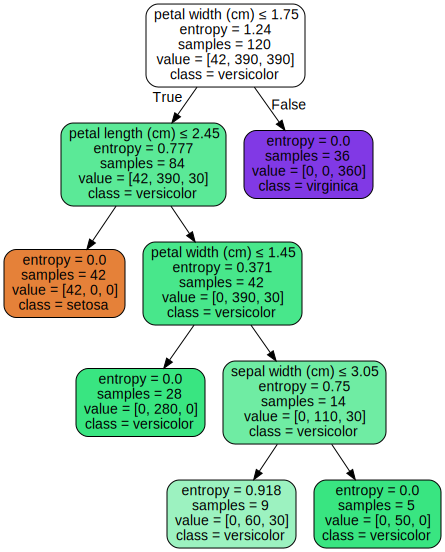

In [22]:
# Print tree graph

dot_data_w = tree.export_graphviz(clf_weighted, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data_w)
graph

# 3. Exercise
learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.

In [23]:
from sklearn.model_selection import GridSearchCV

print(f'X_train: {X_train.shape}\t X_test: {X_test.shape}\t y_train: {y_train.shape}\t y_test: {y_test.shape}')

# Params Grid
grid = {
    'criterion':['entropy', 'gini'],
    'max_depth': [2,3,5,None],
    'min_samples_leaf': [5,10,15,1],
    'min_impurity_decrease':[0.05,0.03, 0.01, 0.0],
    'min_samples_split': [5, 10, 15, 2],
    'max_leaf_nodes': [5, 10, 15, None],
    'max_features': ['auto', None],
    'random_state': [300]
}

# Grid search CV for parameter tuning
clf_refined = GridSearchCV(DecisionTreeClassifier(), grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit and Predict
clf_refined = clf_refined.fit(X_train, y_train)
clf_refined_pred = clf_refined.predict(X_test)

# Print results
print(f"Predictions:\n{clf_refined_pred} Lenght:{len(clf_refined_pred)}")
print(f"True Classes: \n{y_test} Lenght: {len(y_test)}")

truth_table = clf_refined_pred == y_test

print(f"\n Are the Predictions and True classes the same? {(truth_table).all()}")
print(f"{truth_table} Length: {len(truth_table)}")
print(f"True: {sum(truth_table)} False: {len(y_test)-sum(truth_table)}\n")


print(f'Best Params: \n{clf_refined.best_params_}\n')
print(f'CV score for GS: {clf_refined.best_score_}\n')

df = pd.DataFrame(clf_refined.cv_results_)
df.sort_values('rank_test_score').head(5)


X_train: (120, 4)	 X_test: (30, 4)	 y_train: (120,)	 y_test: (30,)
Predictions:
[1 1 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2] Lenght:30
True Classes: 
[1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2] Lenght: 30

 Are the Predictions and True classes the same? False
[ True False  True  True  True  True  True False  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True] Length: 30
True: 27 False: 3

Best Params: 
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.05, 'min_samples_leaf': 5, 'min_samples_split': 5, 'random_state': 300}

CV score for GS: 0.9666666666666668



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,...,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001201,4.005672e-04,0.000401,0.000491,entropy,2,auto,5,0.05,5,...,300,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",1.0,0.958333,0.958333,1.0,0.916667,0.966667,0.03118,1
2340,0.002002,6.503192e-07,0.000027,0.000053,gini,2,None,5,0.01,10,...,300,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.0,0.958333,0.958333,1.0,0.916667,0.966667,0.03118,1
2341,0.002002,7.893059e-07,0.000000,0.000000,gini,2,None,5,0.01,10,...,300,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.0,0.958333,0.958333,1.0,0.916667,0.966667,0.03118,1
2342,0.001425,5.209954e-04,0.000577,0.000473,gini,2,None,5,0.01,10,...,300,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.0,0.958333,0.958333,1.0,0.916667,0.966667,0.03118,1
2343,0.001376,5.131714e-04,0.000400,0.000491,gini,2,None,5,0.01,10,...,300,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.0,0.958333,0.958333,1.0,0.916667,0.966667,0.03118,1


#### Scoring and tree graph

In [24]:
# Accuracy score
acc_score = accuracy_score(y_test, clf_refined_pred)
print(f"Accuracy score: {acc_score}")

# Macro F1 score
f1 = f1_score(y_test, clf_refined_pred, average='macro')
print(f"F1 score: {f1}")

Accuracy score: 0.9
F1 score: 0.9089026915113871


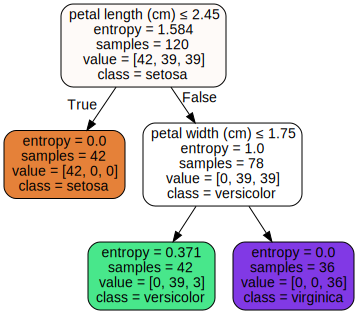

In [25]:
# Print tree graph

dot_data_w = tree.export_graphviz(clf_refined.best_estimator_, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data_w)
graph

# 4. Exercise
Build the confusion matrix of the created tree models on the test set and show them. 

In [26]:
# Confusion matrix of all models
inflated_cfm = confusion_matrix(y_true=y_test, y_pred=clf_inflated_pred)
weighted_cfm = confusion_matrix(y_true=y_test, y_pred=clf_weighted_pred)
refined_cfm = confusion_matrix(y_true=y_test, y_pred=clf_refined_pred)

index = ["setosa(act)", "versicolor(act)", "virginica(act)"]
columns = ["setosa(pred)", "versicolor(pred)", "virginica(pred)"]

# Create cfm dataframes
df_inflated = pd.DataFrame(inflated_cfm, index, columns)
df_weighted = pd.DataFrame(weighted_cfm, index, columns)
df_refined = pd.DataFrame(refined_cfm, index, columns)

print("Confusion Matrix - Inflated")
display(df_inflated)
print("Confusion Matrix - Weighted")
display(df_weighted)
print("Confusion Matrix - Refined")
display(df_refined)

Confusion Matrix - Inflated


,setosa(pred),versicolor(pred),virginica(pred)
setosa(act),8,0,0
versicolor(act),0,10,1
virginica(act),0,2,9


Confusion Matrix - Weighted


,setosa(pred),versicolor(pred),virginica(pred)
setosa(act),8,0,0
versicolor(act),0,10,1
virginica(act),0,2,9


Confusion Matrix - Refined


,setosa(pred),versicolor(pred),virginica(pred)
setosa(act),8,0,0
versicolor(act),0,10,1
virginica(act),0,2,9


# 5. Exercise
build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class. 

In [27]:

subplot_kw = dict(
    xlabel=("False Positive Rate"),
    ylabel=("True Positive Rate"),
    xlim=([-0.01, 1.0]),
    ylim=([0.0, 1.05])
)

def compute_and_plot_roc(title, estimator):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,
                                ncols=3, 
                                sharex=True, 
                                figsize=(24, 6), 
                                subplot_kw=subplot_kw)
    axes = [ax1,ax2,ax3]
    sub_titles = ['setosa (act)', 'versicolor (act)', 'virginica (act)'] 
    colors = ['red', 'green', 'blue']
    

    probs = estimator.predict_proba(X_test)

    for i,ax in enumerate(axes):
        ax.set_title(sub_titles[i])
        fpr, tpr, _ = roc_curve(y_test, probs[:,i], pos_label=i, drop_intermediate=False)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, color=colors[i], label=f'ROC curve (area = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        for x,y in list(zip(tpr,fpr)):
            ax.scatter(y,x, color='black')
        ax.legend(loc='lower right')

    fig.suptitle(f'ROC curves for {title}')




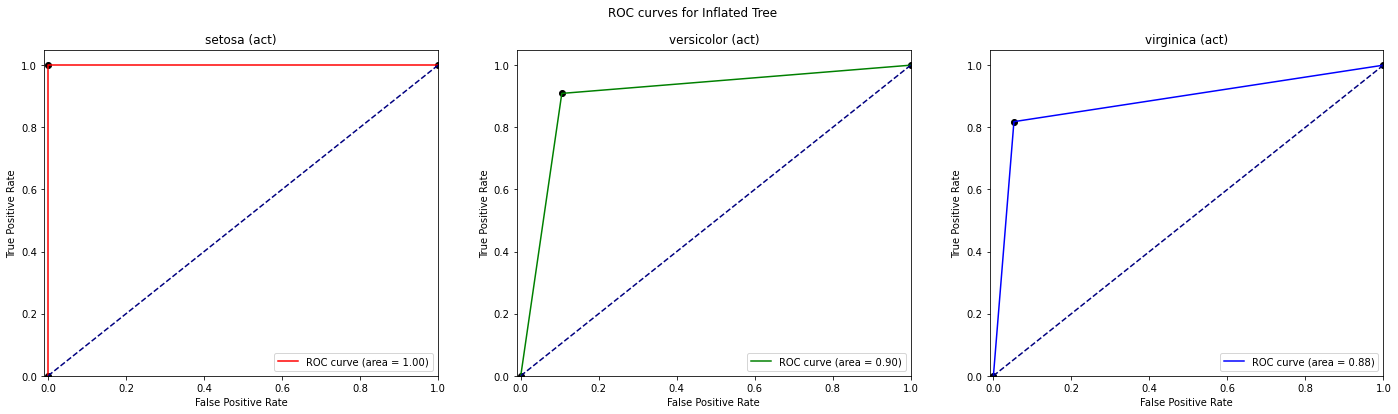

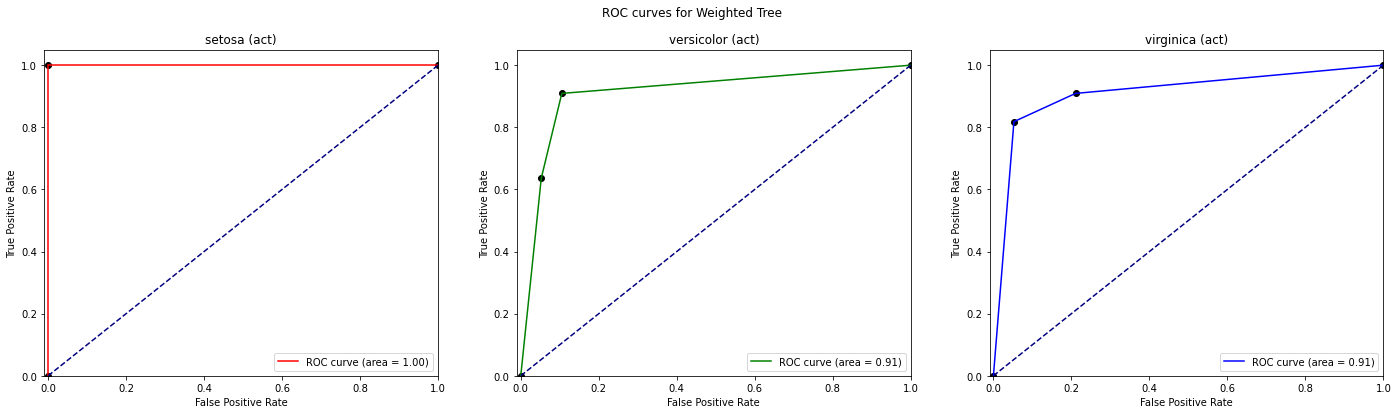

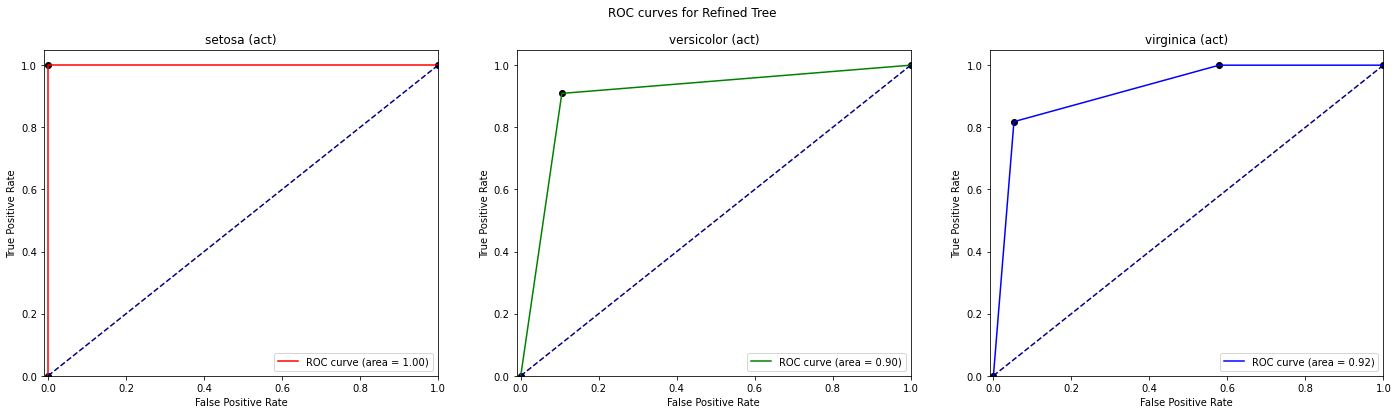

In [28]:
compute_and_plot_roc('Inflated Tree', clf_inflated)
compute_and_plot_roc('Weighted Tree', clf_weighted)
compute_and_plot_roc('Refined Tree', clf_refined)